In [3]:
import scipy.stats as stats
stats.chisquare([18,55,27], [25,50,25])

Power_divergenceResult(statistic=2.62, pvalue=0.26982005638468687)

In [10]:
import scipy.stats as stats
stats.chisquare(f_obs=[2000, 2200], f_exp=[2100, 2100])

Power_divergenceResult(statistic=9.523809523809524, pvalue=0.0020282311484520824)

#
### simulate_chi_distance

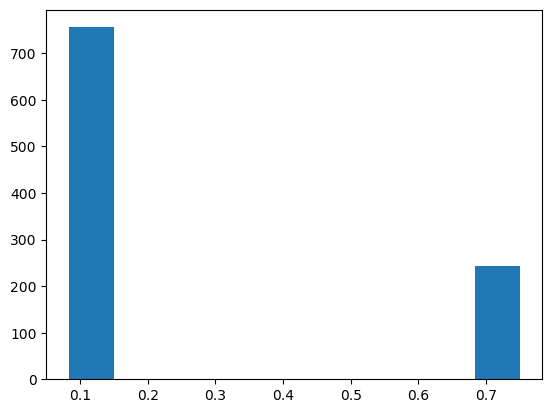

In [21]:
import random
import matplotlib.pyplot as plt

num_chi = 1000
num_obs = 3

y = []

for i in range(num_chi):
    
    x = []
    
    for i in range(num_obs):
        x.append(random.randint(0, 1))
    
    y.append((x.count(0) - num_obs/2)**2 / num_obs/2 + (x.count(1) - num_obs/2)**2 / num_obs/2)

plt.hist(y)
plt.show()

### second way

In [24]:
import random
from math import sqrt

def distance_chi_square_from_toss_coin():
    eagles = 0
    tails = 0
    # подбрасываем монету 60 раз
    for i in range(60):
        if random.randint(0,1):
            eagles += 1
        else:
            tails += 1
    # расчитываем расстояние хи-квадрат Пирсона: 
    # ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
    return (
        (eagles-30)**2/30 + (tails-30)**2/30
    )

In [25]:
# делаем эксперимент 10 тыс.раз, 
# в каждом из которых по 60 раз будем подбрасывать монету 
# и сохранять возвращаемое значение расстояния хи-квадрат
list_of_chi_square = []
for i in range(10000):
    list_of_chi_square.append(distance_chi_square_from_toss_coin())

In [27]:
%pip install seaborn

<ipython-input-28-08c8e91df0a2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list_of_chi_square);


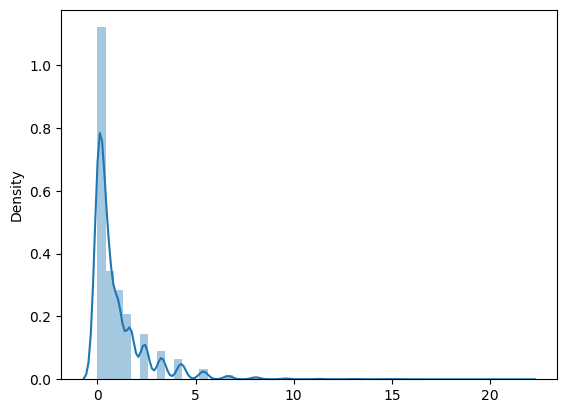

In [28]:
import seaborn as sns

sns.distplot(list_of_chi_square);

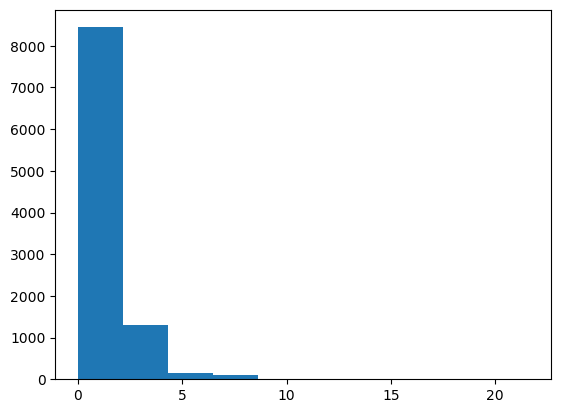

In [29]:
import matplotlib.pyplot as plt

plt.hist(list_of_chi_square);

In [30]:
from scipy.stats.distributions import chi2
chi2.ppf(df=2, q=0.95)

5.991464547107979

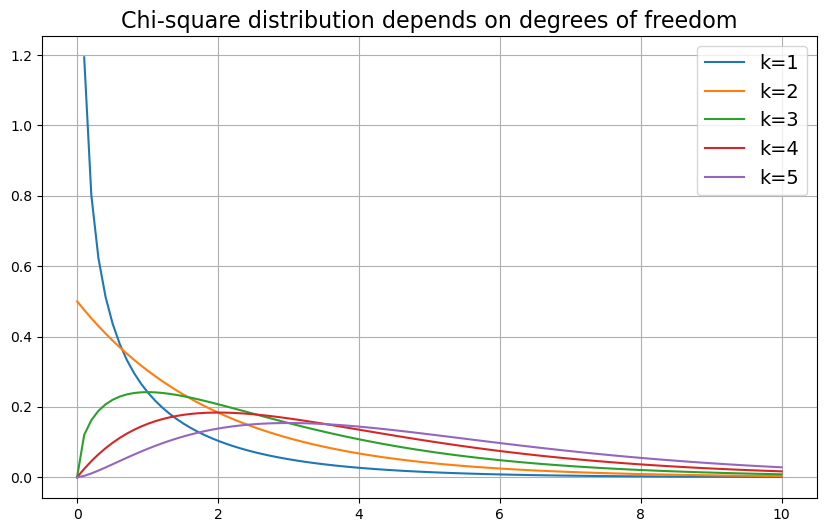

In [1]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

df_s = 5

x = np.linspace(0, 10, 100)

for i in range(df_s):
    df = i + 1
    plt.plot(x, chi2.pdf(x, df), label=f'k={df}')
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.title('Сhi-square distribution depends on degrees of freedom', fontsize=16)
plt.grid()
plt.show()